In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/covid19-goal2/Provisional_COVID-19_death_counts_and_rates_by_month__jurisdiction_of_residence__and_demographic_characteristics.csv


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load original dataset
df = pd.read_csv('/kaggle/input/covid19-goal2/Provisional_COVID-19_death_counts_and_rates_by_month__jurisdiction_of_residence__and_demographic_characteristics.csv')

In [3]:
df.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58806 entries, 0 to 58805
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   data_as_of              58806 non-null  object 
 1   jurisdiction_residence  58806 non-null  object 
 2   year                    58806 non-null  int64  
 3   month                   58806 non-null  int64  
 4   group                   58806 non-null  object 
 5   subgroup1               58806 non-null  object 
 6   subgroup2               45738 non-null  object 
 7   COVID_deaths            44954 non-null  float64
 8   crude_COVID_rate        40267 non-null  float64
 9   aa_COVID_rate           4706 non-null   float64
 10  crude_COVID_rate_ann    40267 non-null  float64
 11  aa_COVID_rate_ann       4706 non-null   float64
 12  footnote                18539 non-null  object 
dtypes: float64(5), int64(2), object(6)
memory usage: 5.8+ MB


In [4]:
df.head()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,data_as_of,jurisdiction_residence,year,month,group,subgroup1,subgroup2,COVID_deaths,crude_COVID_rate,aa_COVID_rate,crude_COVID_rate_ann,aa_COVID_rate_ann,footnote
0,07/10/2025 12:00:00 AM,United States,2020,1,Sex,Female,NaN,3.0,NaN,NaN,NaN,NaN,Rates for death counts <20 are unreliable.
1,07/10/2025 12:00:00 AM,United States,2020,1,Sex,Male,NaN,3.0,NaN,NaN,NaN,NaN,Rates for death counts <20 are unreliable.
2,07/10/2025 12:00:00 AM,United States,2020,1,Age,0-4 years,NaN,0.0,0.0,NaN,0.0,NaN,NaN
3,07/10/2025 12:00:00 AM,United States,2020,1,Age,12-17 years,NaN,0.0,0.0,NaN,0.0,NaN,NaN
4,07/10/2025 12:00:00 AM,United States,2020,1,Age,18-29 years,NaN,0.0,0.0,NaN,0.0,NaN,NaN


In [5]:
df.tail()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,data_as_of,jurisdiction_residence,year,month,group,subgroup1,subgroup2,COVID_deaths,crude_COVID_rate,aa_COVID_rate,crude_COVID_rate_ann,aa_COVID_rate_ann,footnote
58801,07/10/2025 12:00:00 AM,Region 10,2025,6,Race and Age,Non-Hispanic White,40-49 years,0.0,0.0,NaN,0.0,NaN,NaN
58802,07/10/2025 12:00:00 AM,Region 10,2025,6,Race and Age,Non-Hispanic White,5-11 years,0.0,0.0,NaN,0.0,NaN,NaN
58803,07/10/2025 12:00:00 AM,Region 10,2025,6,Race and Age,Non-Hispanic White,50-64 years,NaN,NaN,NaN,NaN,NaN,Death counts between 1-9 are suppressed. Rates...
58804,07/10/2025 12:00:00 AM,Region 10,2025,6,Race and Age,Non-Hispanic White,65-74 years,NaN,NaN,NaN,NaN,NaN,Death counts between 1-9 are suppressed. Rates...
58805,07/10/2025 12:00:00 AM,Region 10,2025,6,Race and Age,Non-Hispanic White,75 years and over,17.0,NaN,NaN,NaN,NaN,Rates for death counts <20 are unreliable.


In [6]:
# Check unique values in the demographic columns
print(df['group'].unique())
print(df['subgroup1'].unique())
print(df['subgroup2'].unique())  

# Check missing values
print(df[['group', 'subgroup1', 'subgroup2', 'COVID_deaths', 'crude_COVID_rate']].isnull().sum())

['Sex' 'Age' 'Race' 'Race and Age']
['Female' 'Male' '0-4 years' '12-17 years' '18-29 years' '30-39 years'
 '40-49 years' '5-11 years' '50-64 years' '65-74 years'
 '75 years and over' 'Hispanic'
 'Non-Hispanic American Indian or Alaska Native' 'Non-Hispanic Asian'
 'Non-Hispanic Asian, Native Hawaiian or Other Pacific Islander'
 'Non-Hispanic Black'
 'Non-Hispanic Native Hawaiian or Other Pacific Islander'
 'Non-Hispanic White']
[nan '0-4 years' '12-17 years' '18-29 years' '30-39 years' '40-49 years'
 '5-11 years' '50-64 years' '65-74 years' '75 years and over']
group                   0
subgroup1               0
subgroup2           13068
COVID_deaths        13852
crude_COVID_rate    18539
dtype: int64


In [7]:
# make it clean and serprate for analysis  

# Filter by demographic group
df_age = df[df['group'] == 'Age'].copy()
df_sex = df[df['group'] == 'Sex'].copy()
df_race = df[df['group'] == 'Race'].copy()


In [8]:
print("Missing in Age Group:", df_age.isnull().sum())
print("Missing in Sex Group:", df_sex.isnull().sum())          ## now each group is formed and now use df_age,info() to see the info about the
print("Missing in Race Group:", df_race.isnull().sum())          ## data


Missing in Age Group: data_as_of                   0
jurisdiction_residence       0
year                         0
month                        0
group                        0
subgroup1                    0
subgroup2                 6534
COVID_deaths              1875
crude_COVID_rate          2447
aa_COVID_rate             6534
crude_COVID_rate_ann      2447
aa_COVID_rate_ann         6534
footnote                  4087
dtype: int64
Missing in Sex Group: data_as_of                   0
jurisdiction_residence       0
year                         0
month                        0
group                        0
subgroup1                    0
subgroup2                 1452
COVID_deaths                21
crude_COVID_rate            34
aa_COVID_rate               34
crude_COVID_rate_ann        34
aa_COVID_rate_ann           34
footnote                  1418
dtype: int64
Missing in Race Group: data_as_of                   0
jurisdiction_residence       0
year                         0
month   

In [9]:
# Add date column for each new column like df_sex , age ,etc 
for df_group in [df_age, df_sex, df_race]:
    df_group['date'] = pd.to_datetime(df_group[['year', 'month']].assign(day=1))


In [10]:
df_age['COVID_deaths'] = df_age['COVID_deaths'].fillna(0)
df_sex['COVID_deaths'] = df_sex['COVID_deaths'].fillna(0)
df_race['COVID_deaths'] = df_race['COVID_deaths'].fillna(0)


In [11]:
##We'll fill missing death rates by the average of the same demographic group in the same month.


# Helper function to fill rate
def impute_crude_rate(df):
    return df.groupby(['subgroup1', 'year', 'month'])['crude_COVID_rate'].transform(
        lambda x: x.fillna(x.mean())
    )

df_age['crude_COVID_rate'] = impute_crude_rate(df_age)
df_sex['crude_COVID_rate'] = impute_crude_rate(df_sex)
df_race['crude_COVID_rate'] = impute_crude_rate(df_race)


In [12]:
columns_to_drop = ['subgroup2', 'aa_COVID_rate', 'crude_COVID_rate_ann', 'aa_COVID_rate_ann', 'footnote']
df_age.drop(columns=columns_to_drop, inplace=True)
df_sex.drop(columns=columns_to_drop, inplace=True)
df_race.drop(columns=columns_to_drop, inplace=True)            # drope the column unnecessary 


In [13]:
print("Age Group:", df_age.isnull().sum())
print("Sex Group:", df_sex.isnull().sum())       ### confirm the clean data 
print("Race Group:", df_race.isnull().sum())


Age Group: data_as_of                0
jurisdiction_residence    0
year                      0
month                     0
group                     0
subgroup1                 0
COVID_deaths              0
crude_COVID_rate          0
date                      0
dtype: int64
Sex Group: data_as_of                0
jurisdiction_residence    0
year                      0
month                     0
group                     0
subgroup1                 0
COVID_deaths              0
crude_COVID_rate          0
date                      0
dtype: int64
Race Group: data_as_of                0
jurisdiction_residence    0
year                      0
month                     0
group                     0
subgroup1                 0
COVID_deaths              0
crude_COVID_rate          0
date                      0
dtype: int64


In [14]:
##Detect Outliers for df_age, df_sex, and df_race

def detect_outliers_iqr(df, column_name):
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[column_name] < lower_bound) | (df[column_name] > upper_bound)]
    print(f"Outliers detected in '{column_name}': {len(outliers)}")
    print(f"Lower bound: {lower_bound}, Upper bound: {upper_bound}")
    return outliers


In [15]:
print("AGE GROUP:")
detect_outliers_iqr(df_age, 'crude_COVID_rate')
detect_outliers_iqr(df_age, 'COVID_deaths')

print("\nSEX GROUP:")
detect_outliers_iqr(df_sex, 'crude_COVID_rate')        ## detecting the outlier for each group 

detect_outliers_iqr(df_sex, 'COVID_deaths')

print("\nRACE GROUP:")
detect_outliers_iqr(df_race, 'crude_COVID_rate')
detect_outliers_iqr(df_race, 'COVID_deaths')


AGE GROUP:
Outliers detected in 'crude_COVID_rate': 1114
Lower bound: -3.75, Upper bound: 6.25
Outliers detected in 'COVID_deaths': 1068
Lower bound: -160.5, Upper bound: 267.5

SEX GROUP:
Outliers detected in 'crude_COVID_rate': 188
Lower bound: -5.6000000000000005, Upper bound: 12.0
Outliers detected in 'COVID_deaths': 201
Lower bound: -1422.5, Upper bound: 2749.5

RACE GROUP:
Outliers detected in 'crude_COVID_rate': 643
Lower bound: -6.000000000000001, Upper bound: 10.8
Outliers detected in 'COVID_deaths': 772
Lower bound: -252.0, Upper bound: 420.0


,data_as_of,jurisdiction_residence,year,month,group,subgroup1,COVID_deaths,crude_COVID_rate,date
1793,07/10/2025 12:00:00 AM,United States,2020,3,Race,Hispanic,1120.0,1.8,2020-03-01
1795,07/10/2025 12:00:00 AM,United States,2020,3,Race,Non-Hispanic Asian,447.0,2.3,2020-03-01
1796,07/10/2025 12:00:00 AM,United States,2020,3,Race,"Non-Hispanic Asian, Native Hawaiian or Other P...",453.0,2.2,2020-03-01
1797,07/10/2025 12:00:00 AM,United States,2020,3,Race,Non-Hispanic Black,2183.0,5.2,2020-03-01
1799,07/10/2025 12:00:00 AM,United States,2020,3,Race,Non-Hispanic White,3255.0,1.7,2020-03-01
...,...,...,...,...,...,...,...,...,...
55259,07/10/2025 12:00:00 AM,United States,2025,3,Race,Non-Hispanic White,1858.0,0.9,2025-03-01
55583,07/10/2025 12:00:00 AM,Region 4,2025,3,Race,Non-Hispanic White,507.0,1.2,2025-03-01
56150,07/10/2025 12:00:00 AM,United States,2025,4,Race,Non-Hispanic White,1215.0,0.6,2025-04-01
57041,07/10/2025 12:00:00 AM,United States,2025,5,Race,Non-Hispanic White,738.0,0.4,2025-05-01


In [16]:
# data have the nagetive values as oulier so remove this because deaths has not be neg
# another outliers are relible so we keep it removing of that is unrealistic 



# Remove negative outliers (invalid data)
df_age = df_age[(df_age['COVID_deaths'] >= 0) & (df_age['crude_COVID_rate'] >= 0)]
df_sex = df_sex[(df_sex['COVID_deaths'] >= 0) & (df_sex['crude_COVID_rate'] >= 0)]
df_race = df_race[(df_race['COVID_deaths'] >= 0) & (df_race['crude_COVID_rate'] >= 0)]


In [17]:
# Function to check for negative values in columns
def check_negative_outliers(df, group_name):
    print(f"\nChecking for negative values in {group_name} group:")
    neg_deaths = df[df['COVID_deaths'] < 0]
    neg_rate = df[df['crude_COVID_rate'] < 0]
    
    if neg_deaths.empty and neg_rate.empty:
        print("✅ No negative outliers found in 'COVID_deaths' or 'crude_COVID_rate'.")
    else:
        if not neg_deaths.empty:
            print(f"❌ Found {len(neg_deaths)} negative values in 'COVID_deaths'.")
        if not neg_rate.empty:
            print(f"❌ Found {len(neg_rate)} negative values in 'crude_COVID_rate'.")

# Apply to all groups
check_negative_outliers(df_age, "AGE")
check_negative_outliers(df_sex, "SEX")
check_negative_outliers(df_race, "RACE")



Checking for negative values in AGE group:
✅ No negative outliers found in 'COVID_deaths' or 'crude_COVID_rate'.

Checking for negative values in SEX group:
✅ No negative outliers found in 'COVID_deaths' or 'crude_COVID_rate'.

Checking for negative values in RACE group:
✅ No negative outliers found in 'COVID_deaths' or 'crude_COVID_rate'.


In [18]:
# Exploratory Data Analysis (EDA)

# Summary stats for each group
print("📊 AGE GROUP STATS:")
print(df_age[['COVID_deaths', 'crude_COVID_rate']].describe())

print("\n📊 SEX GROUP STATS:")
print(df_sex[['COVID_deaths', 'crude_COVID_rate']].describe())

print("\n📊 RACE GROUP STATS:")
print(df_race[['COVID_deaths', 'crude_COVID_rate']].describe())


## What's the meaning of all this?
##You are seeing right-skewed distributions:

##Most rows (regions/months) report low or 0 deaths.

#A few have very high deaths → They pull the mean higher.

#That’s why median < mean in all cases.

# Summary Table:

#Group	 MeanDeaths	  Std Dev	          Median	             Max	                 Conclusion
#Age	375	           1977	              0	                  61202	          Many zero deaths, few high outliers
#Sex	1693	       4616	            362	                 58423	          More evenly spread, but still skewed
#Race	495	           2532	             21	                  67990	          Mostly low values, some huge outliers

📊 AGE GROUP STATS:
       COVID_deaths  crude_COVID_rate
count   6534.000000       6534.000000
mean     375.570095          7.142611
std     1977.868454         27.883746
min        0.000000          0.000000
25%        0.000000          0.000000
50%        0.000000          0.200000
75%      107.000000          2.500000
max    61202.000000        835.100000

📊 SEX GROUP STATS:
       COVID_deaths  crude_COVID_rate
count   1452.000000       1452.000000
mean    1693.957300          5.386762
std     4616.588286          8.458183
min        0.000000          0.000000
25%      142.000000          1.000000
50%      362.000000          2.400000
75%     1185.000000          5.400000
max    58423.000000        124.500000

📊 RACE GROUP STATS:
       COVID_deaths  crude_COVID_rate
count   5082.000000       5082.000000
mean     495.856553          4.566081
std     2532.932659          8.724861
min        0.000000          0.000000
25%        0.000000          0.300000
50%       21.000000         

/tmp/ipykernel_36/3365648780.py:30: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


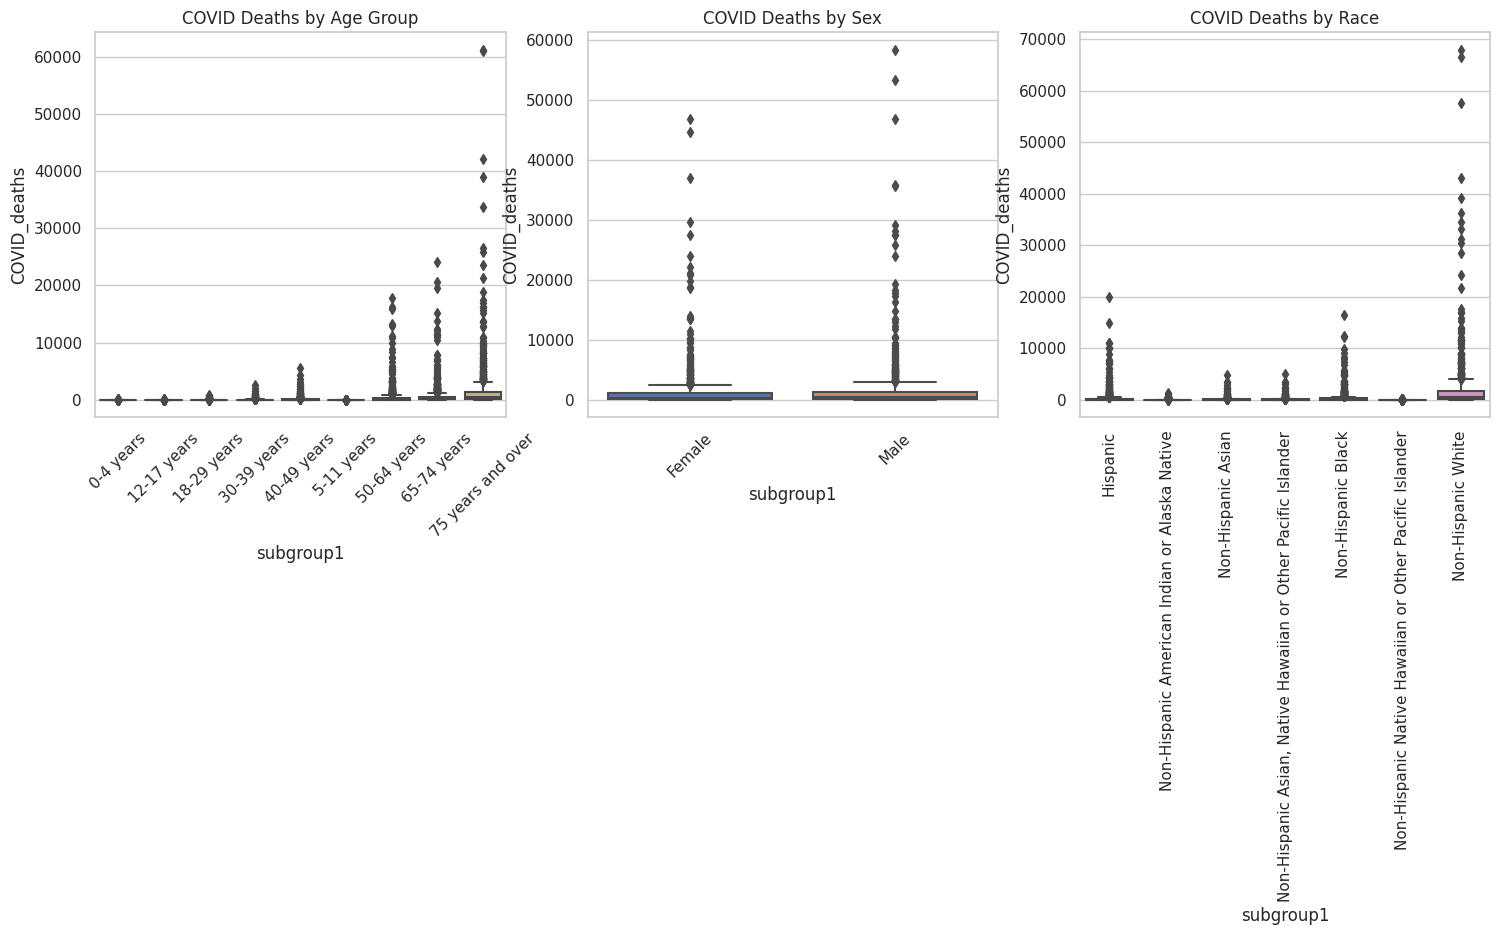

In [19]:
#comparing COVID_deaths and crude_COVID_rate across age, sex, and race  or also known as demogaraphic Desparites



import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid")
plt.figure(figsize=(18, 5))

# AGE GROUP
plt.subplot(1, 3, 1)
sns.boxplot(x="subgroup1", y="COVID_deaths", data=df_age)
plt.title("COVID Deaths by Age Group")
plt.xticks(rotation=45)

# SEX GROUP
plt.subplot(1, 3, 2)
sns.boxplot(x="subgroup1", y="COVID_deaths", data=df_sex)
plt.title("COVID Deaths by Sex")
plt.xticks(rotation=45)

# RACE GROUP
plt.subplot(1, 3, 3)
sns.boxplot(x="subgroup1", y="COVID_deaths", data=df_race)
plt.title("COVID Deaths by Race")
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

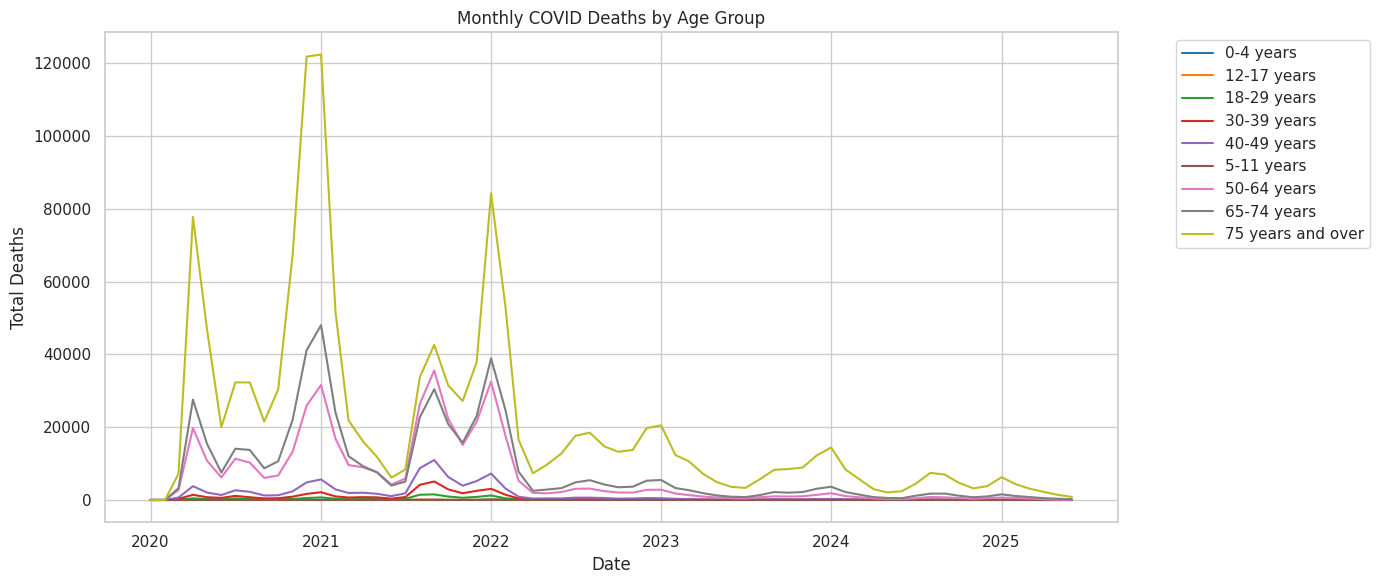

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

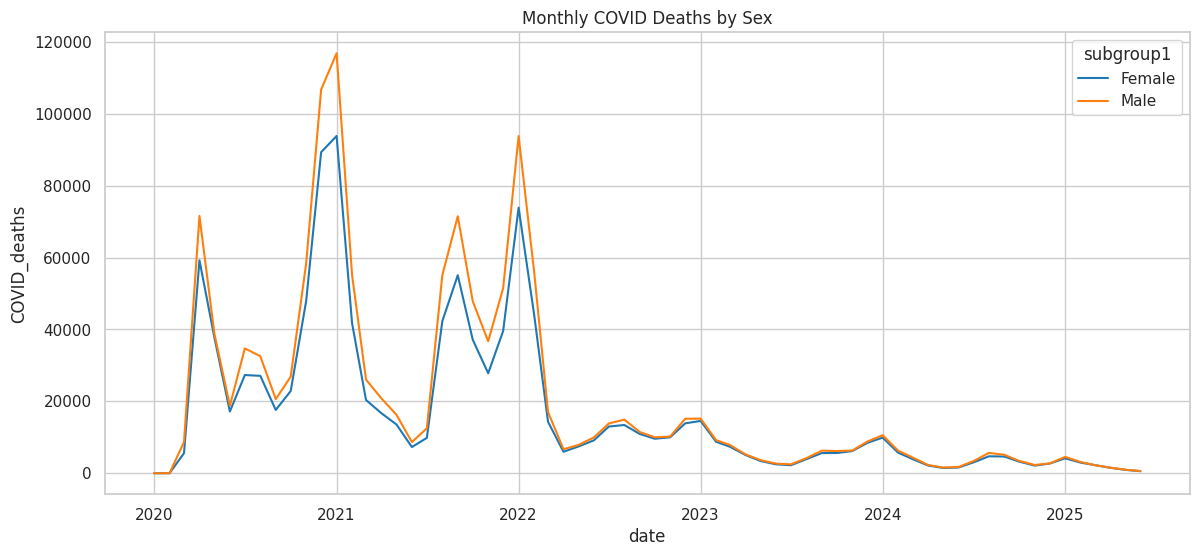

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

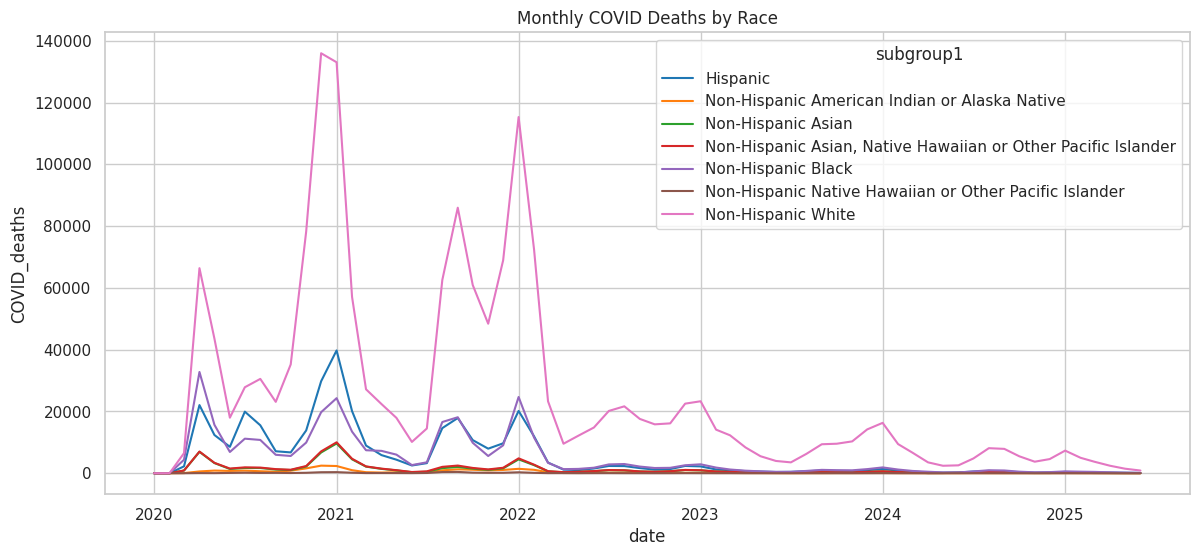

In [20]:
# Example: Total COVID deaths by month for each age group
monthly_age = df_age.groupby(['date', 'subgroup1'])['COVID_deaths'].sum().reset_index()

plt.figure(figsize=(14,6))
sns.lineplot(data=monthly_age, x="date", y="COVID_deaths", hue="subgroup1", palette="tab10")
plt.title("Monthly COVID Deaths by Age Group")
plt.xlabel("Date")
plt.ylabel("Total Deaths")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


# For sex group
monthly_sex = df_sex.groupby(['date', 'subgroup1'])['COVID_deaths'].sum().reset_index()

plt.figure(figsize=(14,6))
sns.lineplot(data=monthly_sex, x="date", y="COVID_deaths", hue="subgroup1", palette="tab10")
plt.title("Monthly COVID Deaths by Sex")
plt.show()

# For race group
monthly_race = df_race.groupby(['date', 'subgroup1'])['COVID_deaths'].sum().reset_index()

plt.figure(figsize=(14,6))
sns.lineplot(data=monthly_race, x="date", y="COVID_deaths", hue="subgroup1", palette="tab10")
plt.title("Monthly COVID Deaths by Race")
plt.show()



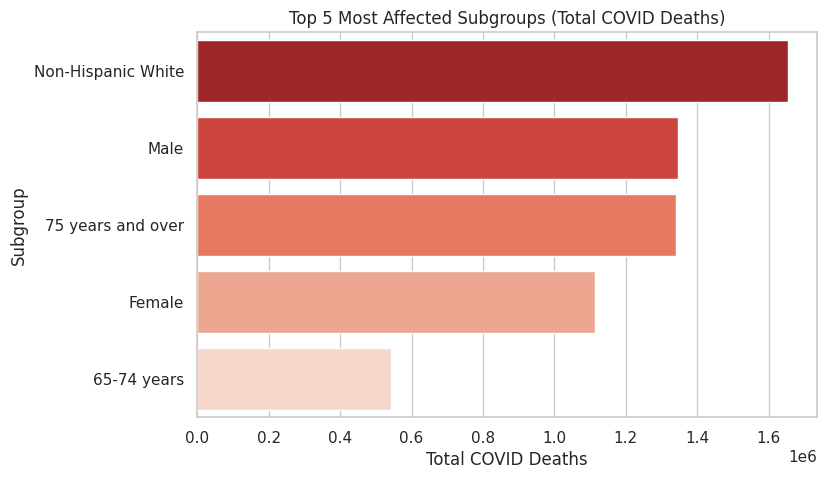

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Combine all subgroups for unified analysis
combined_df = pd.concat([df_age, df_sex, df_race], axis=0)

# Total deaths by subgroup1
top_5_subgroups = (combined_df
                   .groupby('subgroup1')['COVID_deaths']
                   .sum()
                   .sort_values(ascending=False)
                   .head(5))

# Plot
plt.figure(figsize=(8,5))
sns.barplot(x=top_5_subgroups.values, y=top_5_subgroups.index, palette="Reds_r")
plt.title("Top 5 Most Affected Subgroups (Total COVID Deaths)")
plt.xlabel("Total COVID Deaths")
plt.ylabel("Subgroup")
plt.show()


In [22]:
import plotly.express as px

# Total deaths by subgroup (same as before)
subgroup_totals = (combined_df
                   .groupby('subgroup1')['COVID_deaths']
                   .sum()
                   .reset_index()
                   .sort_values(by='COVID_deaths', ascending=False))

# Interactive bar plot
fig = px.bar(subgroup_totals.head(15),
             x='COVID_deaths',
             y='subgroup1',
             orientation='h',
             title='Top 15 Subgroups by Total COVID Deaths',
             labels={'COVID_deaths': 'Total Deaths', 'subgroup1': 'Subgroup'},
             color='COVID_deaths',
             color_continuous_scale='Reds')

fig.update_layout(yaxis={'categoryorder':'total ascending'})
fig.show()
